# 偏差與方差的平衡策略

在ML中，我們透過設計loss function來量化學習的好壞，當預測值與標籤差異越小，loss就越小，
正常情況下我們會希望得到的 loss 就是 general loss(泛化誤差)，只要loss下降對總體的預測能力會實質的上升。

而general loss主要由3種loss組成:

### 偏差

偏差主要來自於錯誤的假設，例如資料及看起來是線性但實際上是2次，錯誤的模型可能導致高度偏差，發生擬合不足的事情。

### 方差

所謂的方差就是模型對資料集微小的變化過度敏感導致，有可能是平方後放大了變化程度或者模型的高自由度(大量的權重、非常大的值域範圍)也可能產生高方差產生過擬合問題

### 無法避免的誤差

這一類誤差通常來自資料本身的Noise以至於預測模型無法完美的Match真實模型，又或者資料的雜亂、過多無用的資訊可能同步提升偏差與方差的產生，我們可以透過種種的資料預處理動作降低Noise的影響。


## 結論

在這樣的過程中我們發現:

#### * 增加模型複雜度會提升方差降低偏差
#### * 降低模型複雜度會提升偏差降低方差
#### * 對資料的預處理可以有效降低無法避免的誤差產生

在特徵工程中會更專注在資料的預處理效果降低 general loss，在ML的領域中則透過調整模型的複雜度，取得偏差與方差的最佳平衡。

# 過擬合(overfitting)

過擬合是一種現象。當我們提高在訓練數據上的表現時，在測試數據上反而下降，這就被稱為過擬 合，或過配。 例如: 表現在訓練數據上的誤差非常小，而在測試數據上誤差反而增大。其原因一般是模型過於復雜，過分得去擬合 數據的噪聲和outliers.正則化則是對模型參數添加先驗，使得模型複雜度較小，對於噪聲以及outliers的輸入擾動相對較小。

過擬合發生的本質原因，是由於監督學習問題的不適定：在高中數學我們知道，從n個（線性無關）方程可以解n個變量，解n+1個變量就會解不出。在監督學習中，數據遠遠少於模型空間（變量龐大） ，那麼就會發生過擬合。

過擬合可以分解成以下2點：

* 有限的訓練數據不能完全反映出一個模型的好壞，然而我們卻不得不在這有限的數據上挑選模型，因此我們完全有可能挑選到在訓練數據上表現很好而在測試數據上表現很差的模型，因為我 們完全無法知道模型在測試數據上的表現。

* 如果模型空間很大，也就是有很多很多模型可以給我們挑選，那麼挑到對的模型的機會就會很小。

過度擬合的問題通常發生在變量（特徵）過多的時候。這種情況下訓練出的方程總是能很好的擬合訓練數據，也就是說，我們的代價函數可能非常接近於0 或者就為0。 但是，這樣的曲線千方百計的去擬合訓練數據，這樣會導致它無法泛化到新的數據樣本中，以至於無法預測新樣本價格。

### 如果沒足夠的數據集去約束變量過多的模型，那麼就會發生過擬合。防止過擬合的目的是為了讓模型的生命更長久，把它扔到現實的數據海洋中活得好，活得久。

 

# 正則化(Regularization)

在調整模型複雜度中，通常各模型都有一定的架構，我們無法隨意改變架構去調整複雜度，因此希望透過限制模型自由度的方式去改變複雜度

在多項式回歸中，較簡單的作法是去降低冪次，其他模型也有以限制權重大小的方式降低自由度。



# Ridge Regression


Ridge Regression 在DL又叫做 weight decay(權重衰減)，核心思想是透過限制權重大小來限制模型的學習能力降低複雜度，具體的做法就是在Cost function 中加入$\theta^2$，為了降低loss 勢必會限縮權重大小
重新改寫過的Cost function:

## $$ Cost(\hat{y}, y) = (\hat{y} - y)^2 + \alpha *\frac{ \sum_{i=1}^n \theta_{i}^2} {2}$$

也有人叫$ \sum_{i=1}^n \theta_{i}^2$ 為 L2 norm，當Cost = 0，我們會得到顯解:

## $$ \hat{\theta} = (X^T \cdot X + \alpha A)^{-1}\cdot X^T \cdot y$$


## 特性

因為使用了平方項，**所以對越大的權重會越敏感，越小的權重越遲鈍**。這句話的意思是說對於很大的權重會以指數方式抑制成長，對預越接近0的權重反而會
盡可能保留不去抑制。

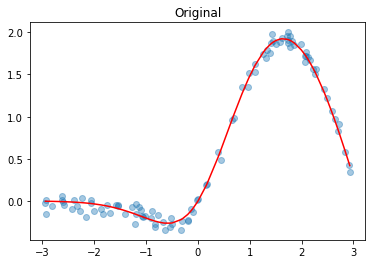

In [1]:
import numpy as np
import matplotlib.pyplot as plt




X = np.random.rand(100)*6-3
X = np.sort(X)
y = np.sin(X) + np.tanh(X)*np.sin(X)
noise =  np.random.randn(100) * y.mean()*0.1

plt.scatter(x = X, y = y+noise, alpha=0.4)
plt.plot(X, y, color = 'r')
plt.title('Original')
plt.show()

/home/hanshin/miniconda3/envs/skl/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.29835e-20): result may not be accurate.
  overwrite_a=True).T
/home/hanshin/miniconda3/envs/skl/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


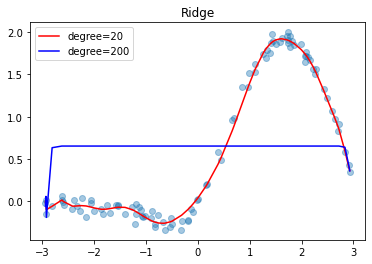

In [2]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

degree = 20
transformer = PolynomialFeatures(degree = degree, include_bias=False) # 資料轉換器 轉換後會自動添加冪次特徵
train_x = transformer.fit_transform(X.reshape(-1, 1))
train_y = y+noise



net = Ridge(alpha=0.5) 
net.fit(train_x, train_y)

yhat = net.predict(train_x)


plt.scatter(x = X, y = y+noise, alpha=0.4)
plt.plot(X, yhat.reshape(-1), label = 'degree=20', color = 'r')



degree = 200
transformer = PolynomialFeatures(degree = degree, include_bias=False) # 資料轉換器 轉換後會自動添加冪次特徵
train_x = transformer.fit_transform(X.reshape(-1, 1))
train_y = y+noise



net = Ridge(alpha=0.5) 
net.fit(train_x, train_y)

yhat = net.predict(train_x)


plt.plot(X, yhat.reshape(-1), label = 'degree=200', color = 'b')
plt.legend()
plt.title('Ridge')
plt.show()

/home/hanshin/miniconda3/envs/skl/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


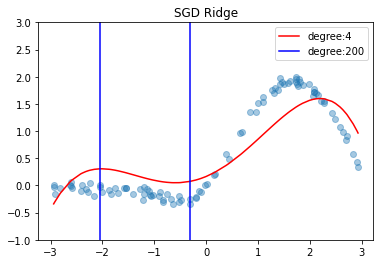

In [3]:
# SGD Regressor 實現

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

degree = 4
transformer = PolynomialFeatures(degree = degree, include_bias=False) # 資料轉換器 轉換後會自動添加冪次特徵
train_x = transformer.fit_transform(X.reshape(-1, 1))
train_y = y+noise




lr=0.001
net = SGDRegressor(max_iter=1000,  random_state=42, eta0=lr, penalty = 'l2') # penalty: 設定懲罰項 l2
net.fit(train_x, train_y)

yhat = net.predict(train_x)


plt.scatter(x = X, y = y+noise, alpha=0.4)
plt.plot(X, yhat.reshape(-1), label = 'degree:4', color = 'r')


degree = 200
transformer = PolynomialFeatures(degree = degree, include_bias=False) # 資料轉換器 轉換後會自動添加冪次特徵
train_x = transformer.fit_transform(X.reshape(-1, 1))
train_y = y+noise




lr=0.001
net = SGDRegressor(max_iter=1000,  random_state=42, eta0=lr, penalty = 'l2') # penalty: 設定懲罰項 l2
net.fit(train_x, train_y)

yhat = net.predict(train_x)

plt.plot(X, yhat.reshape(-1), label = 'degree:200', color = 'b')


plt.ylim(-1, 3)
plt.legend()
plt.title("SGD Ridge")
plt.show()

# Lasso Regression

### 公式如下:
## $$ Cost(\hat{y}, y) = (\hat{y} - y)^2 + \alpha * \sum_{i=1}^n| \theta_i |$$

也有人叫$ \sum_{i=1}^n| \theta_i | $ 為 L1 norm

## 特性:
Lasso 與 Ridge只差在 懲罰項的不同，但特性不盡相同。 Lasso使用了絕對值距離幼教曼哈頓距離，對權重大小較無這麼敏感，因此它傾向於一致性的衰減
，這樣的特性會讓Lasso對於較不重要的權重(較小的權重)做完全的消除，也就是=0。  

也就是說Lasso會選擇較重要的特徵，刪除掉不重要的特徵，權重會是一個稀疏矩陣。

刪除不重要特徵的動作其實滿有爭議的，某種程度上你可以稱不重要特徵叫雜訊，但是你無法忽略在某些狀況下，這些不重要的特徵反而是決策關鍵，因此Lasso Regression 以降低loss來說是相對不穩定的。

如果以多項是回歸做舉例:

一個300階的冪次特徵使用了Lasso Regression可能只表現出2次模型，因為高於2次的權重都被設為0，這樣的作法可能剛好契合資料樣子，但是也有可能大錯特錯。做PCA分析中我們可以知道一件事，**有些高維資料可能長的跟低維資料有87像**


/home/hanshin/miniconda3/envs/skl/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.646095747215956, tolerance: 0.007434816236643755
  positive)
/home/hanshin/miniconda3/envs/skl/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.535631105135808, tolerance: 0.007434816236643755
  positive)


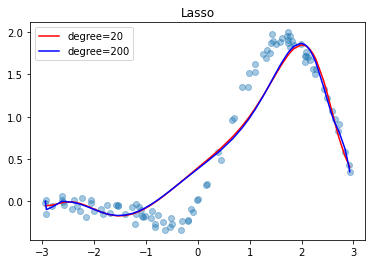

In [4]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

degree = 20
transformer = PolynomialFeatures(degree = degree, include_bias=False) # 資料轉換器 轉換後會自動添加冪次特徵
train_x = transformer.fit_transform(X.reshape(-1, 1))
train_y = y+noise



net = Lasso(alpha=0.1) 
net.fit(train_x, train_y)

yhat = net.predict(train_x)


plt.scatter(x = X, y = y+noise, alpha=0.4)
plt.plot(X, yhat.reshape(-1), label = 'degree=20', color = 'r')



degree = 200
transformer = PolynomialFeatures(degree = degree, include_bias=False) # 資料轉換器 轉換後會自動添加冪次特徵
train_x = transformer.fit_transform(X.reshape(-1, 1))
train_y = y+noise



net = Lasso(alpha=0.1) 
net.fit(train_x, train_y)

yhat = net.predict(train_x)


plt.plot(X, yhat.reshape(-1), label = 'degree=200', color = 'b')
plt.legend()
plt.title('Lasso')
plt.show()

# ElasticNet


ElasticNet是一種混合ridge與lasso的作法，上面兩種作法都有優缺點但是小孩子才要做選擇對吧?

透過公式我們可以發現當r = 0，ElasticNet = ridge; r = 1，ElasticNet = lasso




### 公式如下:
## $$ Cost(\hat{y}, y) = (\hat{y} - y)^2 + r * \alpha * \sum_{i=1}^n| \theta_i | + (1-r) * \alpha *\frac{ \sum_{i=1}^n \theta_{i}^2} {2} $$


/home/hanshin/miniconda3/envs/skl/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.986999553638005, tolerance: 0.007434816236643755
  positive)
/home/hanshin/miniconda3/envs/skl/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.532690192744241, tolerance: 0.007434816236643755
  positive)


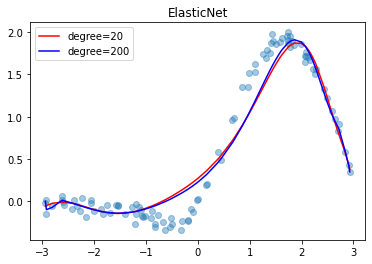

In [5]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

degree = 20
transformer = PolynomialFeatures(degree = degree, include_bias=False) # 資料轉換器 轉換後會自動添加冪次特徵
train_x = transformer.fit_transform(X.reshape(-1, 1))
train_y = y+noise



net = ElasticNet(alpha=0.1, l1_ratio=0.5)
net.fit(train_x, train_y)

yhat = net.predict(train_x)


plt.scatter(x = X, y = y+noise, alpha=0.4)
plt.plot(X, yhat.reshape(-1), label = 'degree=20', color = 'r')



degree = 200
transformer = PolynomialFeatures(degree = degree, include_bias=False) # 資料轉換器 轉換後會自動添加冪次特徵
train_x = transformer.fit_transform(X.reshape(-1, 1))
train_y = y+noise



net = ElasticNet(alpha=0.1, l1_ratio=0.3)
net.fit(train_x, train_y)

yhat = net.predict(train_x)


plt.plot(X, yhat.reshape(-1), label = 'degree=200', color = 'b')
plt.legend()
plt.title('ElasticNet')
plt.show()

# 結論


正則化提供了3種方式: ridge、lasso、ElasticNet，這三種方式各有優缺點但原則上不管選擇哪一種有做正則化的regression都比未做的效果好。

正則化在某種程度上會強化聯合學習的效果，讓每一筆資料都有一點影響力或者讓模型更充分學習。因此在模型中加入一點正則化吧，ridge是一個不錯的默認選擇，當然如果你認為只有少數特徵需要用於預測，你可以選用lasso、ElasticNet，個人比較建議使用ElasticNet，lasso對於某些狀況相對不穩定一些。


# 其他小技巧

# Free Lunch: Early Stop


early stop可以說是一種最簡單實踐的正則化小技巧了，說白了就是讓資料先跑個夠出現過擬和狀況，透過驗證集分析什麼時候會得到最低的loss，再重頭訓練一次在之前評估最美好的moment停下來吧，如此簡單又粗暴不愧是免費的午餐啊啊啊啊啊啊

通常這個技巧都是用在SGD，畢竟顯解可是沒有什麼moment就直接強制中出答案啊~